In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
from typing import List
from tqdm import tqdm_notebook
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import cKDTree
from itertools import combinations

# (2) Реализуйте Монте-Карло поиск. 

In [2]:
data = pd.read_csv("../data/tsp.csv", index_col=0, header=None).values

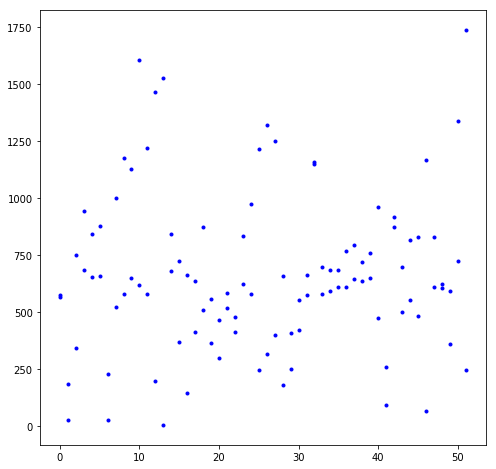

In [3]:
plt.figure(figsize=(8,8))
plt.plot(data, 'b.')
plt.show()

In [4]:
distances = squareform(pdist(data, metric='cityblock'))

In [5]:
def eval_path(path):
    s = 0
    for i in range(len(path)-1):
        s += distances[path[i], path[i+1]]
    return s

def random_path(distances):
    a = list(range(len(data)))
    np.random.shuffle(a)
        
    return data[a], eval_path(a)

In [27]:
min_path, min_dist = min((random_path(distances) for _ in tqdm_notebook(range(1_000_000))), key = lambda t: t[1])

In [32]:
def plot_path_l1(path):
    for i in range(len(path)-1):
        # (x1, y1) -> (x2, y1) -> (x2,y2)      
        plt.plot([path[i][0], path[i+1][0]], [path[i][1], path[i][1]], 'r-')
        plt.plot([path[i+1][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'r-')
    
    plt.plot(path[0][0], path[0][1], 'go') # start
    plt.plot(path[-1][0], path[-1][1], 'bo') # end

Minimal distance 26195.0


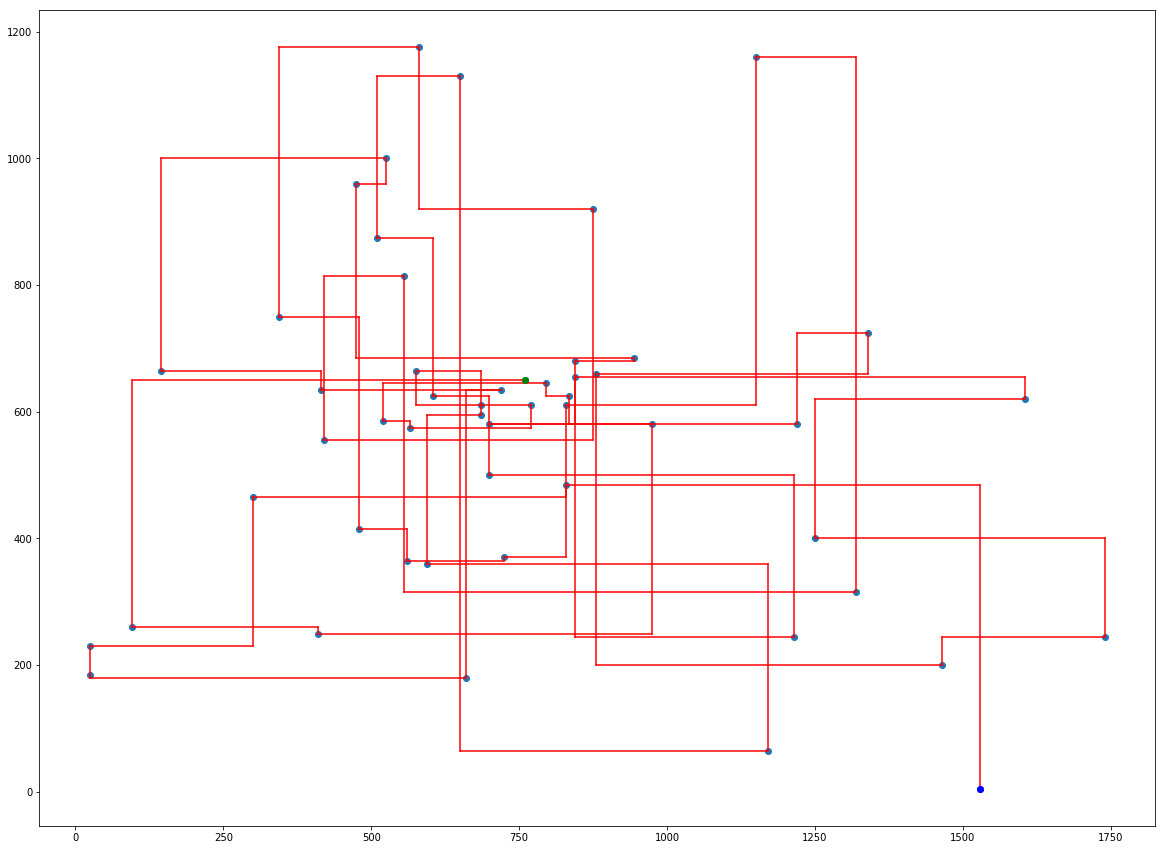

In [33]:
plt.figure(figsize=(20,15))
plt.scatter(data[:,0], data[:,1])

plot_path_l1(min_path)
print(f"Minimal distance {min_dist}")
plt.show()

# (2) Реализуйте поиск случайным блужданием.

In [30]:
a = list(range(len(data)))
def random_walk():
    best_walk = None
    best_dist = np.inf
    for _ in tqdm_notebook(range(int(1_000_000))):
        l, r = np.random.randint(0, len(data), size=2)
        a[l], a[r] = a[r], a[l]
        
        s = eval_path(a)
        if s < best_dist:
            best_dist = s
            best_walk = a

    return data[best_walk], best_dist

In [31]:
best_walk, best_dist = random_walk()

Minimal distance 26695.0


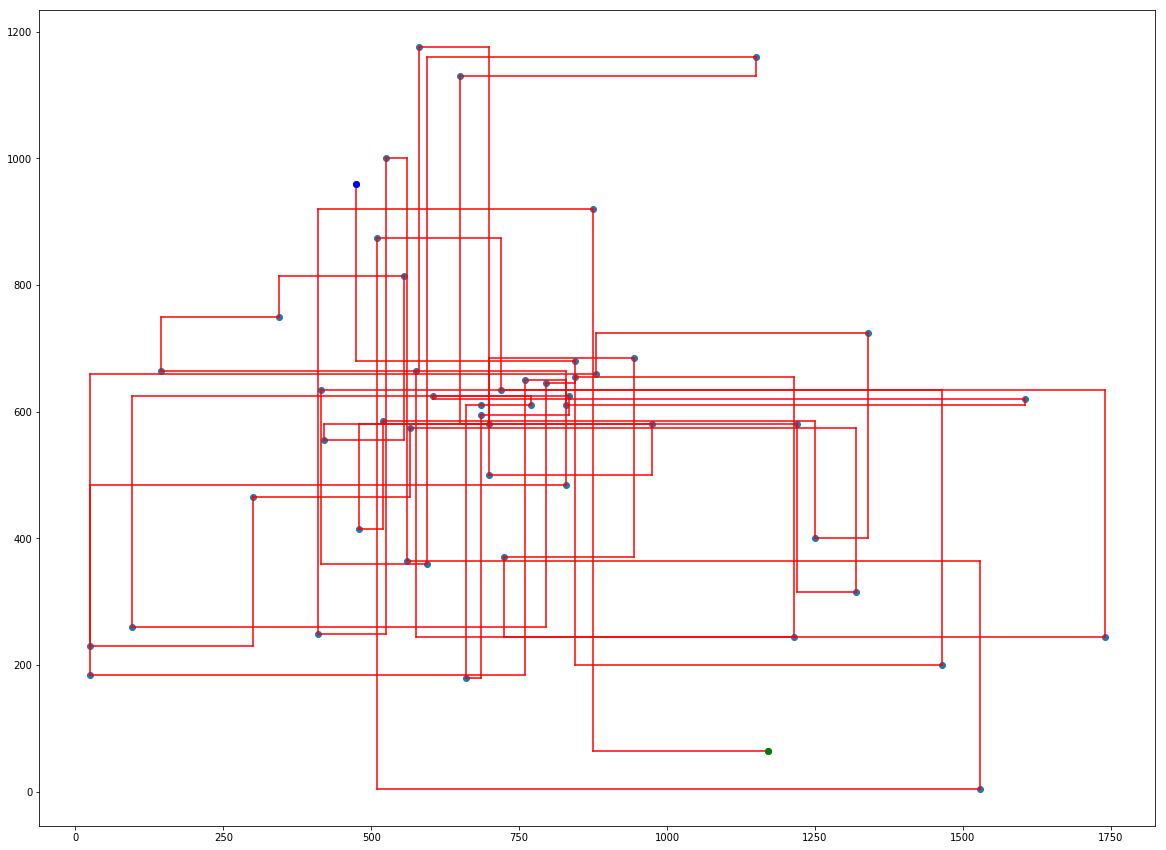

In [34]:
plt.figure(figsize=(20,15))
plt.scatter(data[:,0], data[:,1])

plot_path_l1(best_walk)
print(f"Minimal distance {best_dist}")
plt.show()

# (4) Реализуйте Hill Climb.


In [38]:
def hillclimb():
    
    def step(walk):
        for i,j in combinations(range(len(walk)), 2):
            _walk=np.copy(walk)
            _walk[i:j+1]=np.flip(_walk[i:j+1])

            if (_walk != walk).any():
                yield _walk

    best_walk = list(range(len(data)))
    best_dist = eval_path(best_walk)
    
    for _ in tqdm_notebook(range(1_000_000)):
        move_made = False
        
        for s in step(best_walk):        
            next_dist = eval_path(s)
            if next_dist < best_dist:
                best_walk = s
                best_dist = next_dist
                move_made = True
                break
            
        if not move_made:
            break
    
    return best_dist, best_walk


In [39]:
best_dist, best_walk = hillclimb()

Minimal distance 9085.0


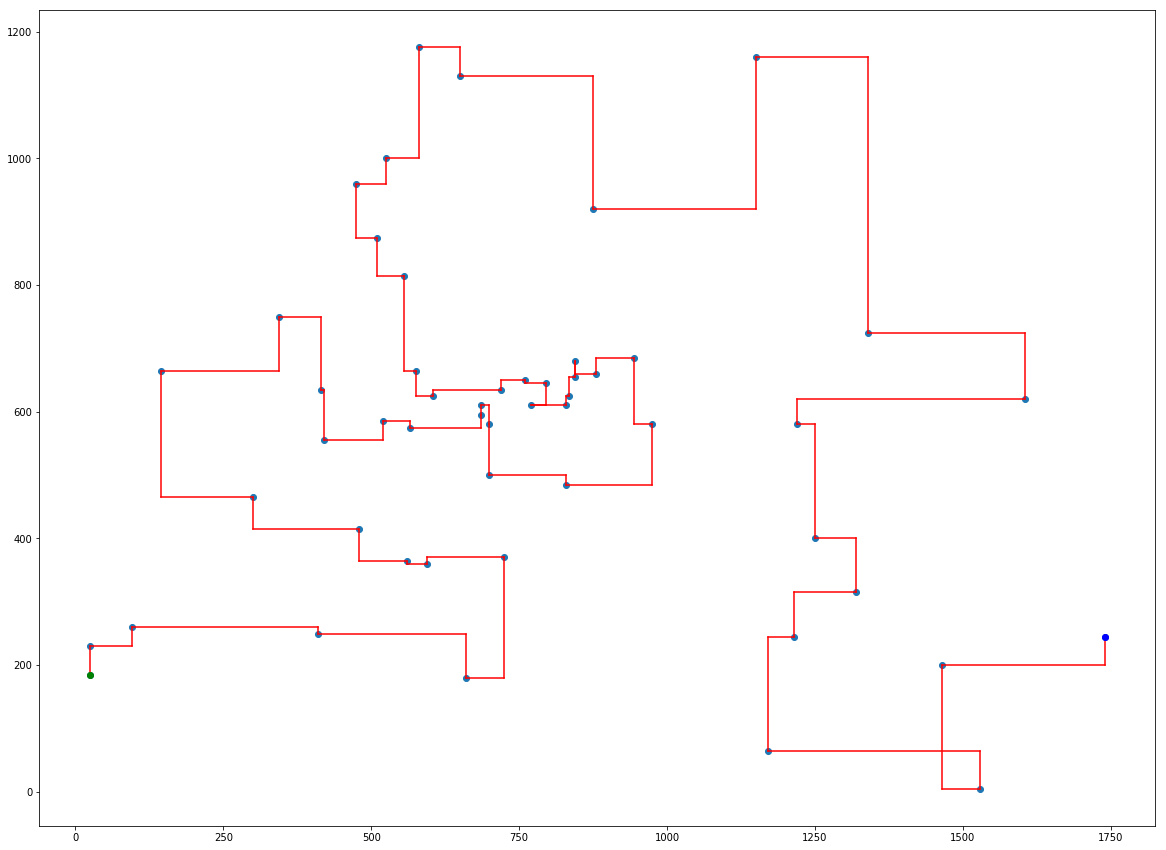

In [40]:
plt.figure(figsize=(20,15))
plt.scatter(data[:,0], data[:,1])

plot_path_l1(data[best_walk])
print(f"Minimal distance {best_dist}")
plt.show()